# 数据预处理：整理数据

## 生成所有的周五日期

In [ ]:
# w.wsd('159901.SZ', "close,open,high,low,pre_close,chg,pct_chg,volume,amt", "", convert_date_format('20221115'), "")
# for key, value in index_code.items():
#     _df = pro.index_daily(ts_code=value)
#     _df.to_csv(f'dataset/index_data/{key}.csv', index=False)

In [4]:
""" 由于笔记本被收纳到单独的文件夹里，运行时 需且仅需一次 运行本模块来调整工作目录到项目目录下 """
import pandas as pd
from datetime import datetime, timedelta
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV
import lightgbm as lgb
import sklearn.metrics as skmat
import os


# 获取当前工作目录
current_dir = os.getcwd()
print("Current directory:", current_dir)

# 设置工作目录为上一级目录
parent_dir = os.path.dirname(current_dir)
os.chdir(parent_dir)
print("New working directory:", os.getcwd())

Current directory: e:\VSCodeFiles\quant\best\notebooks
New working directory: e:\VSCodeFiles\quant\best


# 划分数据集

## 导入包和数据

In [7]:
test_list = ['cal', 'GDP:不变价:当季同比', 'GDP:环比:季调', '中国:社会融资规模存量:同比', '中国:M1:同比', '中国:M2:同比', '中国:社会融资规模:新增人民币贷款:当月值:同比', '中国:金融机构:人民币:资金运用:各项贷款:境内贷款:住户贷款:中长期贷款:同比', '中国:金融机构:人民币:资金运用:各项贷款:境内贷款:企(事)业单位贷款:中长期贷款:同比', '中国:中央政府收入:一般公共预算收入:当月值:同比', '中国:税收收入:当月同比', '中国:中央政府支出:本级一般公共预算支出:当月值:同比', '中国:全国政府性基金收入:累计同比', '中国:地方本级政府性基金收入:国有土地使用权出让收入:累计同比', '中国:地方政府性基金支出:国有土地使用权出让金收入安排的支出:累计同比', '固定资产投资完成额:累计同比', '固定资产投资完成额:制造业:累计同比', '固定资产投资完成额:基础设施建设投资:累计同比', '中国:房地产开发投资完成额:累计同比', '社会消费品零售总额:当月同比', '社会消费品零售总额:商品零售:当月同比', '零售额:粮油、食品类:当月同比', '零售额:汽车类:当月同比', '零售额:石油及制品类:当月同比', '社会消费品零售总额:餐饮收入:当月同比', '中国综合PMI:产出指数', 'PMI', '非制造业PMI:商务活动', '工业增加值:当月同比', '服务业生产指数:当月同比', '中国:出口金额:当月同比', '中国:出口金额:累计同比', '中国:进口金额:当月同比', '中国:进口金额:累计同比', '城镇新增就业人数:累计同比', '城镇调查失业率', 'CPI:当月同比', 'CPI:不包括食品和能源(核心CPI):当月同比', 'CPI:食品烟酒:畜肉类:猪肉:当月同比', 'PPI:全部工业品:当月同比', 'PPI:生产资料:当月同比', 'PPI:生活资料:当月同比', '中国:固定资产投资完成额:设备工器具购置:累计同比', '中国:工业企业:产成品存货:同比', '中国:工业企业:利润总额:累计同比', '中国:社会消费品零售总额:季调:环比', 'GDP:不变价:当季同比', '中国:社会融资规模存量:同比', '中国:M1:同比', '中国:M2:同比', '固定资产投资完成额:累计同比', '固定资产投资完成额:制造业:累计同比', '固定资产投资完成额:基础设施建设投资:累计同比', '中国:房地产开发投资完成额:累计同比', '社会消费品零售总额:当月同比', 'PMI', '工业增加值:当月同比', '中国:出口金额:当月同比', '中国:进口金额:当月同比', '城镇调查失业率', 'CPI:当月同比', 'PPI:全部工业品:当月同比', '中国社会融资规模', '中国新增人民币贷款', '国债到期收益率:1年', '国债到期收益率:10年', '美国:国债收益率:1年', '美国:国债收益率:10年', '即期汇率:美元兑人民币:倒数', '申万新股指数', '上证所:股票成交金额', '深交所:股票成交金额', '融资买入额/成交金额:万得全A', '深市:融资买入额/深交所:A股:总成交金额', '深交所:A股:总成交金额', '上证所:A股:总成交金额', '沪股通:当日资金净流入(人民币)', '深股通:当日资金净流入(人民币)', '中证1000收益率', '中证1000点位分位数', '中证1000换手率', 'GDP:不变价:当季同比', '中国:社会融资规模存量:同比', '中国:M1:同比', '中国:M2:同比', '固定资产投资完成额:累计同比', '固定资产投资完成额:制造业:累计同比', '固定资产投资完成额:基础设施建设投资:累计同比', '中国:房地产开发投资完成额:累计同比', '社会消费品零售总额:当月同比', 'PMI', '工业增加值:当月同比', '中国:出口金额:当月同比', '中国:进口金额:当月同比', '城镇调查失业率', 'CPI:当月同比', 'PPI:全部工业品:当月同比', '中国社会融资规模', '中国新增人民币贷款', 'GDP:不变价:当季同比', '中国:社会融资规模存量:同比', '中国:M1:同比', '中国:M2:同比', '固定资产投资完成额:累计同比', '固定资产投资完成额:制造业:累计同比', '固定资产投资完成额:基础设施建设投资:累计同比', '中国:房地产开发投资完成额:累计同比', '社会消费品零售总额:当月同比', 'PMI', '工业增加值:当月同比', '中国:出口金额:当月同比', '中国:进口金额:当月同比', '城镇调查失业率', 'CPI:当月同比', 'PPI:全部工业品:当月同比', '中国社会融资规模', '中国新增人民币贷款', 'GDP:不变价:当季同比', 'GDP:环比:季调', '中国:社会融资规模存量:同比', '中国:M1:同比', '中国:M2:同比', '中国:社会融资规模:新增人民币贷款:当月值:同比', '中国:金融机构:人民币:资金运用:各项贷款:境内贷款:住户贷款:中长期贷款:同比', '中国:金融机构:人民币:资金运用:各项贷款:境内贷款:企(事)业单位贷款:中长期贷款:同比', '中国:中央政府收入:一般公共预算收入:当月值:同比', '中国:税收收入:当月同比', '中国:中央政府支出:本级一般公共预算支出:当月值:同比', '中国:全国政府性基金收入:累计同比', '中国:地方本级政府性基金收入:国有土地使用权出让收入:累计同比', '中国:地方政府性基金支出:国有土地使用权出让金收入安排的支出:累计同比', '固定资产投资完成额:累计同比', '固定资产投资完成额:制造业:累计同比', '固定资产投资完成额:基础设施建设投资:累计同比', '中国:房地产开发投资完成额:累计同比', '社会消费品零售总额:当月同比', '社会消费品零售总额:商品零售:当月同比', '零售额:粮油、食品类:当月同比', '零售额:汽车类:当月同比', '零售额:石油及制品类:当月同比', '社会消费品零售总额:餐饮收入:当月同比', '中国综合PMI:产出指数', 'PMI', '非制造业PMI:商务活动', '工业增加值:当月同比', '服务业生产指数:当月同比', '中国:出口金额:当月同比', '中国:出口金额:累计同比', '中国:进口金额:当月同比', '中国:进口金额:累计同比', '城镇新增就业人数:累计同比', '城镇调查失业率', 'CPI:当月同比', 'CPI:不包括食品和能源(核心CPI):当月同比', 'CPI:食品烟酒:畜肉类:猪肉:当月同比', 'PPI:全部工业品:当月同比', 'PPI:生产资料:当月同比', 'PPI:生活资料:当月同比', '中国:固定资产投资完成额:设备工器具购置:累计同比', '中国:工业企业:产成品存货:同比', '中国:工业企业:利润总额:累计同比', '中国:社会消费品零售总额:季调:环比', 'rsi', 'SMA2', 'SMA4', 'SMA7', 'SMA10', 'SMA15', 'EMA2', 'EMA4', 'EMA7', 'EMA10', 'EMA15', 'WMA2', 'WMA4', 'WMA7', 'WMA10', 'WMA15', 'DEMA2', 'DEMA4', 'DEMA7', 'DEMA10', 'DEMA15', 'MAMA2', 'MAMA4', 'MAMA7', 'MAMA10', 'MAMA15', 'RSI6', 'RSI12', 'RSI20', 'MOM6', 'MOM12', 'MACD', 'MACDsignal', 'MACDhist', 'MTM6', 'MTMMA6', 'MTM12', 'MTMMA12', 'K', 'c', 'J', 'CCI', 'ATR', 'ROC', 'Boll', 'Boll', 'Boll', 'BIAS6', 'BIAS12', 'BIAS20', '涨跌幅', 'label3']

In [21]:
import pandas as pd
import os
import pickle
import numpy as np

test_df = pd.read_excel('dataset/test_data/weekday_split_data_20240121_friday2.xlsx')

In [22]:
def process(df):
    df['factor_date'] = pd.to_datetime(df['factor_date'], format='%Y%m%d')
    df = df.set_index('factor_date')
    df['涨跌幅'] = df['week_rt']
    df['label3'] = (df['week_rt']>0).astype(int)
    try:
        df = df.drop(columns=['factor_or_pretrade_date','sell_date','is_open','close','week_rt','000852.SH'])
    
    except:
        df = df.drop(columns=['factor_or_pretrade_date','close','week_rt','000852.SH'])
    
    all_data = df.copy()
    return all_data

test_df = process(test_df)


In [23]:
def factor_correction(factors):
    suffixes = ['_' + '_'.join(factor.split('_')[1:]) if '_' in factor else '' for factor in factors]
    factors = [factor.split('_')[0] for factor in factors]
    
    except_factors = ['中国综合PMI:产出指数', 
                      '即期汇率:美元兑人民币:倒数', 
                      '申万新股指数', 
                      '融资买入额/成交金额:万得全A', 
                      '000852.SH', '指标名称'
                      ]
    factors = ['中国:'+factor if ((not factor.startswith('美国:')) and (not factor.startswith('中国:')) and (not factor.startswith('深股通:')) and (not factor.startswith('label3')) 
                                 and (not factor.startswith('上证所:')) and (not factor.startswith('沪股通:')) and (not factor.startswith('国债')) and (not factor.startswith('涨跌幅')) 
                                 and (not factor.startswith('中证1000')) and (not factor.startswith('深交所:')) and (not factor.startswith('深市')) and (not factor=='cal_weekday') 
                                 and (factor not in except_factors)) else factor for factor in factors ]
    conversion_dict = {
        '中国:GDP:环比:季调': '中国:GDP:季调:环比',
        '中国:PMI': '中国:制造业PMI',
        '中国:中国官方制造业PMI': '中国:制造业PMI',
        '中国:中国新增人民币贷款': '中国:金融机构:新增人民币贷款:当月值',
        '中国:国债到期收益率:1年': '国债到期收益率:1年',
        '中国:工业增加值:当月同比': '中国:规模以上工业增加值:当月同比',
        '中国:中国社会融资规模': '中国:社会融资规模:当月值'
    }
    factors = [conversion_dict[factor] + suffixes[i] if factor in conversion_dict.keys() else factor + suffixes[i] for i, factor in enumerate(factors)]
    return factors


test_df.columns = factor_correction(test_df.columns)


In [24]:
def factor_correction(factors):
    suffixes = ['_' + '_'.join(factor.split('_')[1:]) if '_' in factor else '' for factor in factors]
    factors = [factor.split('_')[0] for factor in factors]
    
    except_factors = ['中国综合PMI:产出指数', 
                      '即期汇率:美元兑人民币:倒数', 
                      '申万新股指数', 
                      '融资买入额/成交金额:万得全A', 
                      '000852.SH', '指标名称'
                      ]
    factors = ['中国:'+factor if ((not factor.startswith('美国:')) and (not factor.startswith('中国:')) and (not factor.startswith('深股通:')) and (not factor.startswith('label3')) 
                                 and (not factor.startswith('上证所:')) and (not factor.startswith('沪股通:')) and (not factor.startswith('国债')) and (not factor.startswith('涨跌幅')) 
                                 and (not factor.startswith('中证1000')) and (not factor.startswith('深交所:')) and (not factor.startswith('深市')) and (not factor=='cal_weekday') 
                                 and (factor not in except_factors)) else factor for factor in factors ]
    conversion_dict = {
        '中国:GDP:环比:季调': '中国:GDP:季调:环比',
        '中国:PMI': '中国:制造业PMI',
        '中国:中国官方制造业PMI': '中国:制造业PMI',
        '中国:中国新增人民币贷款': '中国:金融机构:新增人民币贷款:当月值',
        '中国:国债到期收益率:1年': '国债到期收益率:1年',
        '中国:工业增加值:当月同比': '中国:规模以上工业增加值:当月同比',
        '中国:中国社会融资规模': '中国:社会融资规模:当月值'
    }
    factors = [conversion_dict[factor] + suffixes[i] if factor in conversion_dict.keys() else factor + suffixes[i] for i, factor in enumerate(factors)]
    return factors


test_df.columns = factor_correction(test_df.columns)


## 划分数据集

In [46]:
from datetime import datetime, timedelta

def split_train_test(all_data, edate):
    """
    根据给定的开始日期sdate和结束日期edate划分数据集为训练集和测试集。
    
    参数:
    - all_data: 包含所有数据的Pandas DataFrame
    - edate: 划分数据集的结束日期，格式为datetime对象
    
    返回:
    - train_features: 训练集的特征数据
    - test_features: 测试集的特征数据
    - train_y3: 训练集的目标变量（涨跌幅）
    - test_y3: 测试集的目标变量（涨跌幅）
    - train_label3: 训练集的分类标签
    - test_label3: 测试集的分类标签
    """

    # 划分训练集和测试集
    train_data = all_data[(all_data.index < edate)].sort_index()
    test_data = all_data[(all_data.index >= edate) & (all_data['中国:cal_weekday'] == 5)].sort_index()

    # 选择除标签列以外的所有列作为特征
    train_features = train_data.drop(columns=['label3', '涨跌幅', '中国:cal_weekday'])
    test_features = test_data.drop(columns=['label3', '涨跌幅', '中国:cal_weekday'])

    # 目标变量
    train_y3 = train_data['涨跌幅']
    test_y3 = test_data['涨跌幅']

    # 分类标签
    train_label3 = train_data['label3']
    test_label3 = test_data['label3']

    return train_features, test_features, train_y3, test_y3, train_label3, test_label3

In [47]:

train_start_date = datetime(2009, 1, 1)
train_end_date = datetime(2022, 1, 1)

(train_features, test_features, train_y3, test_y3, train_label3, test_label3) = split_train_test(test_df, train_end_date)



# 分类-网格搜索

## 特征选择

In [52]:
from feature_selector import FeatureSelector
import numpy as np
import matplotlib.pyplot as plt
import lightgbm as lgb
plt.rcParams['font.sans-serif'] = ['SimHei'] # 显示中文
plt.rcParams['axes.unicode_minus'] = False # 正常显示负号
%matplotlib inline

In [53]:
f_tech=[f for f in train_features.columns if f[-5:]!='_tech']
train_features = train_features[f_tech]
test_features = test_features[f_tech]

In [58]:

fs = FeatureSelector(data = train_features, labels = train_y3)
fs.identify_all(selection_params={'missing_threshold': 0.6,    
                                  'correlation_threshold': 0.7, 
                                  'task': 'regression',    
                                  'eval_metric': 'l2', 
                                  'cumulative_importance': 0.9,
                                  'importance_type': 'gain'
                                  }, 
                early_stop=True)

factors = fs.remove(methods='all', keep_one_hot=True).columns.tolist()
fs.plot_feature_importances(threshold=0.9, plot_n=12)

print(fs.feature_importances.head(60))
print(factors)
print(len(factors))

TypeError: identify_all() got an unexpected keyword argument 'early_stop'

## 训练模型

In [147]:
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV
import lightgbm as lgb
import sklearn.metrics as skmat

In [148]:
def get_res(model, X_test, y_test, thresh=0.5, pred_prob=False):
    X_test = np.array(X_test)
    if pred_prob:
        try:
            y_pred = model.predict_proba(X_test)[:,1]
        except:
            y_pred = model.predict(X_test)
    else:
        y_pred = model.predict(X_test)
        thresh = 0
    eval_df = pd.DataFrame({'y_test': y_test, 'y_pred': y_pred})
    
    tp = ((eval_df['y_test'] > 0) & (eval_df['y_pred'] > thresh)).sum()
    tn = ((eval_df['y_test'] <= 0) & (eval_df['y_pred'] <= thresh)).sum()
    pres = tp / (eval_df['y_pred'] > thresh).sum()
    rec = tp / (eval_df['y_test'] > 0).sum()
    res = (tp + tn) / len(eval_df)
    
    print('大于0的占比',(eval_df['y_test']>0).sum()/100,eval_df['y_test'].sum())
    
    pos_ret=eval_df[eval_df['y_pred']>thresh]['y_test'].sum()
    neg_ret=-eval_df[eval_df['y_pred']<=thresh]['y_test'].sum()
    
    print('准确率{},召回率{},正确率{}'.format(pres,rec,res))
    print('做多收益{},做空收益{},多空收益{}'.format(pos_ret,neg_ret,pos_ret+neg_ret))

    eval_df = pd.DataFrame({'涨跌幅': y_test,
                            'label3': (eval_df['y_test']>= 0)*1,
                            'predictions': (eval_df['y_pred']>= 0.5)*1,
                            '多空策略收益': eval_df[eval_df['y_pred']>thresh]['y_test'].add(-eval_df[eval_df['y_pred']<=thresh]['y_test'], fill_value=0),
                            '做多收益': eval_df[eval_df['y_pred']>thresh]['y_test'],
                            '做空收益': -eval_df[eval_df['y_pred']<=thresh]['y_test']})
    return eval_df


def get_res_by_period(model,X_test,y_test,thresh=0.5,pred_prob=False, period=None):
    start_date = period[0]
    end_date = period[1]
    X_test = X_test[(X_test.index >= start_date) & (X_test.index < end_date)]
    y_test = y_test[(y_test.index >= start_date) & (y_test.index < end_date)]
    X_test=np.array(X_test)
    if pred_prob:
        try:
            y_pred = model.predict_proba(X_test)[:,1]
        except:
            y_pred = model.predict(X_test)
    else:
        y_pred = model.predict(X_test)
        thresh=0
    thresh = 0.5
    eval_df = pd.DataFrame({'y_test':y_test, 'y_pred':y_pred})
#     print(eval_df)
    tp=((eval_df['y_test']>0)&(eval_df['y_pred']>thresh)).sum()
    tn=((eval_df['y_test']<=0)&(eval_df['y_pred']<=thresh)).sum()
    pres=tp/(eval_df['y_pred']>thresh).sum()
    rec=tp/(eval_df['y_test']>0).sum()
    res=(tp+tn)/len(eval_df)
    pos_ret=eval_df[eval_df['y_pred']>thresh]['y_test'].sum()
    neg_ret=-eval_df[eval_df['y_pred']<=thresh]['y_test'].sum()
    print('特定周期内结果为：')
    print('起始日期为：%s 结束日期为：%s' % (str(start_date), str(end_date)))
    print('准确率{},召回率{},正确率{}'.format(pres,rec,res))
    print('做多收益{},做空收益{},多空收益{}'.format(pos_ret,neg_ret,pos_ret+neg_ret))
    eval_df = pd.DataFrame({'涨跌幅': y_test,
                        'label3': (eval_df['y_test']>= 0)*1,
                        'predictions': (eval_df['y_pred']>= 0.5)*1,
                        '多空策略收益': pos_ret+neg_ret,
                        '做多收益': pos_ret,
                        '做空收益': neg_ret})
    return (pos_ret+neg_ret), eval_df

def get_res_step(model,X_test,y_test,thresh=0.5,pred_prob=False, silence=False):
    X_test=np.array(X_test)
    if pred_prob:
        try:
            y_pred = model.predict_proba(X_test)[:,1]
        except:
            y_pred = model.predict(X_test)
    else:
        y_pred, _ = model.predict(X_test)
        thresh=0
#     y_pred = y_pred[:, 0]
    eval_df = pd.DataFrame({'y_test':y_test, 'y_pred':y_pred})
#     print(eval_df)
    tp=((eval_df['y_test']>0)&(eval_df['y_pred']>thresh)).sum()
    tn=((eval_df['y_test']<=0)&(eval_df['y_pred']<=thresh)).sum()
    pres=tp/(eval_df['y_pred']>thresh).sum()
    rec=tp/(eval_df['y_test']>0).sum()
    res=(tp+tn)/len(eval_df)
#     print('大于0的占比',(eval_df['y_test']>0).sum()/100,eval_df['y_test'].sum())
    pos_ret=eval_df[eval_df['y_pred']>thresh]['y_test'].sum()
    neg_ret=-eval_df[eval_df['y_pred']<=thresh]['y_test'].sum()
    if not silence:
        print('准确率{},召回率{},正确率{}'.format(pres,rec,res))
        print('做多收益{},做空收益{},多空收益{}'.format(pos_ret,neg_ret,pos_ret+neg_ret))
    eval_df = pd.DataFrame({'涨跌幅': y_test,
                            'label3': eval_df['y_test'],
                            'predictions': eval_df['y_pred'],
                            '多空策略收益': eval_df[eval_df['y_pred']>thresh]['y_test'].add(-eval_df[eval_df['y_pred']<=thresh]['y_test'], fill_value=0),
                            '做多收益': eval_df[eval_df['y_pred']>thresh]['y_test'],
                            '做空收益': -eval_df[eval_df['y_pred']<=thresh]['y_test']})
    return eval_df


def get_period_res(y_test, y_pred, silence=False, period=None):
    start_date = period[0]
    end_date = period[1]
    y_test = y_test[(y_test.index >= start_date) & (y_test.index < end_date)]
    y_pred = y_pred[(y_pred.index >= start_date) & (y_pred.index < end_date)]
    thresh = 0.5
    eval_df = pd.DataFrame({'y_test':y_test, 'y_pred':y_pred})
#     print(eval_df)
    tp=((eval_df['y_test']>0)&(eval_df['y_pred']>thresh)).sum()
    tn=((eval_df['y_test']<=0)&(eval_df['y_pred']<=thresh)).sum()
    pres=tp/(eval_df['y_pred']>thresh).sum()
    rec=tp/(eval_df['y_test']>0).sum()
    res=(tp+tn)/len(eval_df)
    pos_ret=eval_df[eval_df['y_pred']>thresh]['y_test'].sum()
    neg_ret=-eval_df[eval_df['y_pred']<=thresh]['y_test'].sum()
    if not silence:
        print('特定周期内结果为：')
        print('起始日期为：%s 结束日期为：%s' % (str(start_date), str(end_date)))
        print('准确率{},召回率{},正确率{}'.format(pres,rec,res))
        print('做多收益{},做空收益{},多空收益{}'.format(pos_ret,neg_ret,pos_ret+neg_ret))
    eval_df = pd.DataFrame({'涨跌幅': y_test,
                        'label3': (eval_df['y_test']>= 0)*1,
                        'predictions': (eval_df['y_pred']>= 0.5)*1,
                        '多空策略收益': pos_ret+neg_ret,
                        '做多收益': pos_ret,
                        '做空收益': neg_ret})
    return (pos_ret+neg_ret), eval_df

def get_total_res(y_test, y_pred, silence=False):
    thresh = 0.5
    eval_df = pd.DataFrame({'y_test':y_test, 'y_pred':y_pred})
#     print(eval_df)
    tp=((eval_df['y_test']>0)&(eval_df['y_pred']>thresh)).sum()
    tn=((eval_df['y_test']<=0)&(eval_df['y_pred']<=thresh)).sum()
    pres=tp/(eval_df['y_pred']>thresh).sum()
    rec=tp/(eval_df['y_test']>0).sum()
    res=(tp+tn)/len(eval_df)
    pos_ret=eval_df[eval_df['y_pred']>thresh]['y_test'].sum()
    neg_ret=-eval_df[eval_df['y_pred']<=thresh]['y_test'].sum()
    if not silence:
        print('滚动训练总和结果：')
        print('准确率{},召回率{},正确率{}'.format(pres,rec,res))
        print('做多收益{},做空收益{},多空收益{}'.format(pos_ret,neg_ret,pos_ret+neg_ret))
    eval_df = pd.DataFrame({'涨跌幅': y_test,
                        'label3': (eval_df['y_test']>= 0)*1,
                        'predictions': (eval_df['y_pred']>= 0.5)*1,
                        '多空策略收益': eval_df[eval_df['y_pred']>thresh]['y_test'].add(-eval_df[eval_df['y_pred']<=thresh]['y_test'], fill_value=0),
                        '做多收益': eval_df[eval_df['y_pred']>thresh]['y_test'],
                        '做空收益': -eval_df[eval_df['y_pred']<=thresh]['y_test']})
    return (pos_ret+neg_ret), eval_df

def plot_res(y_pred,y_test):
    x_ax = y_test.index
    plt.figure(figsize=(12, 6))
    plt.plot(x_ax, y_test, label="original")
    plt.plot(x_ax, y_pred, label="predicted")
    plt.title("LightGBM Classification")
    plt.xlabel('时间')
    plt.ylabel('涨跌幅')
    plt.legend(loc='best',fancybox=True, shadow=True)
    plt.grid(True)
    plt.show()
    
def plot_res_direct(labels, predictions):
    predictions = (predictions>= 0.5)*1
    x_ax = labels.index
    plt.figure(figsize=(12, 6))
    plt.plot(x_ax, labels, label="original")
    plt.plot(x_ax, predictions, label="predicted")
    plt.title("LightGBM Classification")
    plt.xlabel('时间')
    plt.ylabel('涨跌幅')
    plt.legend(loc='best',fancybox=True, shadow=True)
    plt.grid(True)
    plt.show()  

In [149]:
X_val=val_features[factors]
X_train=train_features[factors]
X_test=test_features[factors]

X_train.columns=list(range(len(factors)))
X_val.columns=list(range(len(factors)))
X_test.columns=list(range(len(factors)))

In [128]:

param_grid = {
    'boosting_type': ['dart'],
    'objective': ['huber'],
    'max_depth':[4],
    'alpha': [2,4],
    'num_leaves': [16,20,30,25],
    'learning_rate': [0.01,0.02,0.05,0.1],
    'verbose': [-1],
    'n_estimators':[100],
    'reg_alpha': [0.0001,0.01,0.02]
}
def make_grid():
    boosting= ['dart']
    objective = ['cross_entropy']
    alpha= [2,4]
    learning_rate = [0.01,0.02,0.05,0.1]
    n_estimators = [ 100]
    # min_data_in_leaf = [20, 100]
    lambda_l1=[0.0001,0.01,0.02]
    # lambda_l2 = [0,5e-4,5e-3,5e-2,5e-1,5]
    # subsample = [0.5, 0.7, 0.9]
    subsample_freq = [1]
    param_grid_list = []

    for max_depth in [ 4]:
        num_leaves = 2 ** max_depth
        param_grid_list.append({'boosting_type':['dart'],
                                'max_depth': [max_depth],
                                'alpha': [2,4],
                                'objective': objective,
                                'learning_rate': learning_rate,
                                'n_estimators': n_estimators,
                                'num_leaves': [16,20,30,25],
                                'verbose': [-1],
                                # 'min_child_samples': min_data_in_leaf,
                                'reg_alpha': lambda_l1})
    return param_grid_list

param_grid_list = make_grid()
from sklearn.model_selection import TimeSeriesSplit
grid_search = GridSearchCV(estimator=lgb.LGBMClassifier(),
                        #    cv=TimeSeriesSplit(n_splits=5),
                           cv=5,
                           refit='accuracy',
                           param_grid=param_grid_list,
                           verbose=1,
                           n_jobs=-1)


# 执行网格搜索
grid_search.fit(np.array(X_train), train_label3, eval_metric='logloss')

print("最佳参数配置：", grid_search.best_params_)
print("最佳模型得分：", grid_search.best_score_)
# grid_search.best_params_
model = lgb.LGBMClassifier(**grid_search.best_params_)
model.fit(np.array(X_train), train_label3)

Fitting 5 folds for each of 96 candidates, totalling 480 fits
最佳参数配置： {'alpha': 2, 'boosting_type': 'dart', 'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 100, 'num_leaves': 16, 'objective': 'cross_entropy', 'reg_alpha': 0.02, 'verbose': -1}
最佳模型得分： 0.5001657632854398


LGBMClassifier(alpha=2, boosting_type='dart', max_depth=4, num_leaves=16,
               objective='cross_entropy', reg_alpha=0.02, verbose=-1)

In [129]:
grid_search

GridSearchCV(cv=5, estimator=LGBMClassifier(), n_jobs=-1,
             param_grid=[{'alpha': [2, 4], 'boosting_type': ['dart'],
                          'learning_rate': [0.01, 0.02, 0.05, 0.1],
                          'max_depth': [4], 'n_estimators': [100],
                          'num_leaves': [16, 20, 30, 25],
                          'objective': ['cross_entropy'],
                          'reg_alpha': [0.0001, 0.01, 0.02], 'verbose': [-1]}],
             refit='accuracy', verbose=1)

In [130]:
print(grid_search.cv_results_['split0_test_score'].max())
print(grid_search.cv_results_['split1_test_score'].max())
print(grid_search.cv_results_['split2_test_score'].max())
print(grid_search.cv_results_['split3_test_score'].max())
print(grid_search.cv_results_['split4_test_score'].max())
grid_search.cv_results_['mean_test_score'].max()

0.5329949238578681
0.5042301184433164
0.5397631133671743
0.49830508474576274
0.5322033898305085


0.5001657632854398

In [65]:
print(grid_search.cv_results_['split0_test_score'].max())
print(grid_search.cv_results_['split1_test_score'].max())
print(grid_search.cv_results_['split2_test_score'].max())
print(grid_search.cv_results_['split3_test_score'].max())
print(grid_search.cv_results_['split4_test_score'].max())
grid_search.cv_results_['mean_test_score'].max()

0.5143824027072758
0.5262267343485617
0.4890016920473773
0.488135593220339
0.4542372881355932


0.48525395050044456

In [76]:
{'alpha': 2, 
 'boosting': 'dart', 
 'lambda_l1': 0.0001, 
 'learnnig_rate': 0.01, 
 'max_depth': 4, 
 'n_estimators': 100, 
 'num_leaves': 20, 
 'objective': 'huber', 
 'verbose': -1, 
}

{'alpha': 2,
 'boosting': 'dart',
 'lambda_l1': 0.0001,
 'learnnig_rate': 0.01,
 'max_depth': 4,
 'n_estimators': 100,
 'num_leaves': 20,
 'objective': 'huber',
 'verbose': -1}

In [107]:
test_y3

factor_date
2022-01-05   -0.027682
2022-01-12   -1.469742
2022-01-19   -6.446758
2022-01-26   -2.761368
2022-02-09   -0.392767
                ...   
2023-11-29   -1.465026
2023-12-06   -0.070562
2023-12-13   -4.290033
2023-12-20   -1.130848
2023-12-27    2.245060
Name: 涨跌幅, Length: 97, dtype: float64

大于0的占比 1.41 85.63315453169326
准确率0.8152866242038217,召回率0.9078014184397163,正确率0.8257261410788381
做多收益220.6544899986572,做空收益135.02133546696393,多空收益355.67582546562113
大于0的占比 0.49 -34.782093043569425
准确率0.4857142857142857,召回率0.6938775510204082,正确率0.47959183673469385
做多收益-29.713186335467526,做空收益5.068906708101903,多空收益-24.644279627365623


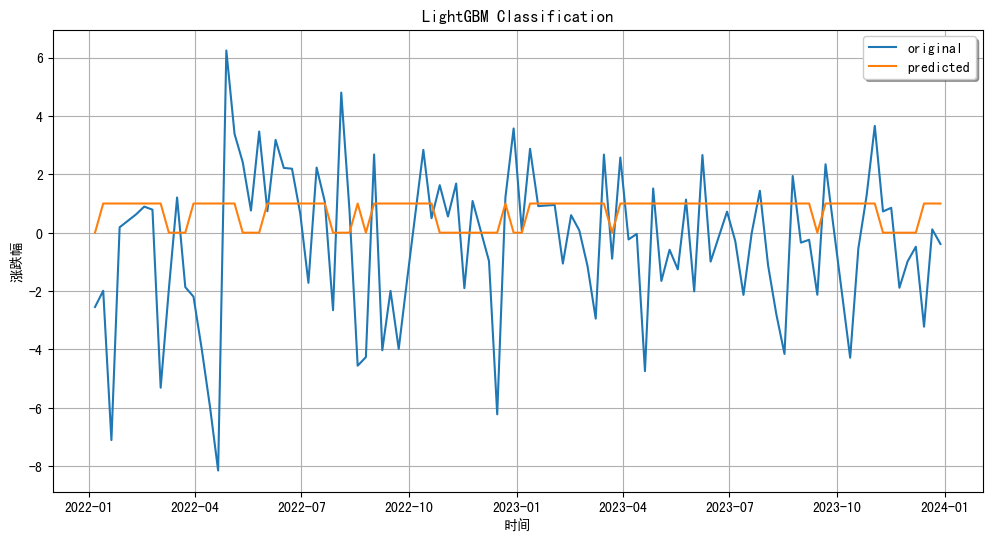

In [142]:


res=get_res(model,X_val,val_y3)
# plot_res(res[''],val_y3)
res=get_res(model,X_test,test_y3,pred_prob=True)
plot_res(model.predict(X_test),test_y3)

In [ ]:
res

,涨跌幅,label3,predictions,多空策略收益,做多收益,做空收益
factor_date,,,,,,
2022-01-07,-0.095365,0,1,-0.095365,-0.095365,NaN
2022-01-14,-3.734366,0,0,3.734366,NaN,3.734366
2022-01-21,-5.626584,0,1,-5.626584,-5.626584,NaN
2022-01-28,0.872521,1,1,0.872521,0.872521,NaN
2022-02-11,3.098458,1,1,3.098458,3.098458,NaN
...,...,...,...,...,...,...
2023-12-15,-3.657695,0,0,3.657695,NaN,3.657695
2023-12-22,2.674024,1,0,-2.674024,NaN,-2.674024
2023-12-29,-3.591260,0,0,3.591260,NaN,3.591260


In [ ]:
len(factors)

51

In [ ]:
# saved_models = best_models
path1='result/1_10/2/'
if not os.path.exists(path1):
    os.makedirs(path1)
best_importance_frame=fs.feature_importances.loc[:len(factors),['feature','normalized_importance']]
with open(path1+'factor'  + '.pkl', 'wb') as f:
    pickle.dump(factors,f)

# with open(path1+'model' + str(i+1) + '.pkl', 'wb') as f:
#     pickle.dump(saved_models[i],f)
from styleframe import StyleFrame, Styler, utils
from openpyxl import Workbook
from openpyxl.chart import (
    LineChart,
    Reference,
)
from copy import deepcopy
from openpyxl.chart.layout import Layout, ManualLayout
from openpyxl.chart.axis import DateAxis
from openpyxl.styles import Font, Color
res1 = res.copy(deep=True)
res1.reset_index(inplace=True)
res1['平权多空策略收益'] = res1['多空策略收益'].fillna(0).transform('cumsum')
res1['平权做多收益'] = res1['做多收益'].fillna(0).transform('cumsum')
res1['平权做空收益'] = res1['做空收益'].fillna(0).transform('cumsum')
res1['累计多空策略收益'] = ((res1['多空策略收益'] / 100) + 1).fillna(1).transform('cumprod')
res1['累计做多收益'] = ((res1['做多收益'] / 100) + 1).fillna(1).transform('cumprod')
res1['累计做空收益'] = ((res1['做空收益'] / 100) + 1).fillna(1).transform('cumprod')
res1['accuracy'] = (res1['label3'] == res1['predictions']).astype(int)
res1['累计胜率'] = res1['accuracy'].cumsum() / (res1.index.values + 1)
res1['累计胜率'] = res1['累计胜率'].transpose()
print(res1['累计胜率'])
print(res1.index.values + 1)
del res1['accuracy']
print(res1)
res1.insert(loc=res1.columns.get_loc('predictions') + 1, column='累计胜率', value=res1.pop('累计胜率'))
print(res1)
res1.loc['总计涨跌幅及2023年收益', ['交易日期', '涨跌幅', '多空策略收益']] = ['总计涨跌幅及2023年收益', res1['涨跌幅'].sum(), 
                    res1.loc[(res1['factor_date']>='2023-01-01') & (res1['factor_date']<='2023-12-31')]['多空策略收益'].sum()]

def draw_chart_openpyxl(worksheet):
    # pos: (row, column)
    font = Font(name='Calibri',
                    size=12,
                    bold=True,
                    italic=False,
                    vertAlign=None,
                    underline='none',
                    strike=False,
                    color='FF000000')
    c2 = LineChart()
    c2.title = "多空策略收益曲线"
    c2.style = 6
    c2.font = font
    c2.y_axis.title = "收益百分比"
    c2.y_axis.crossAx = 500
    c2.x_axis = DateAxis(crossAx=100)
    c2.width = 15
    c2.height = 15
    c2.x_axis.number_format = 'yyyy-mm'
#     c2.x_axis.majorTimeUnit = "days"
    c2.x_axis.title = "日期"
    c2.x_axis.tickLblPos = "low"
    c2.x_axis.txPr = deepcopy(c2.x_axis.title.text.rich)
    c2.x_axis.txPr.properties.rot = "-2700000"
    c2.layout = Layout(
        manualLayout=ManualLayout(
            yMode='edge',
            xMode='edge',
            x=0.1, y=0.1,
            h=0.75, w=0.85
        )
    )
    c2.legend.layout = Layout(
        manualLayout=ManualLayout(
            yMode='edge',
            xMode='edge',
            x=0, y=0.9,
            h=0.1, w=1
        )
    )
    data = Reference(worksheet, min_col=9, max_col=11, min_row=1, max_row=len(res1['涨跌幅'])-2)
    c2.add_data(data, titles_from_data=True)
    dates = Reference(worksheet, min_col=1, max_col=1, min_row=2, max_row=len(res1['涨跌幅'])-2)
    c2.set_categories(dates)
    c2.series[0].graphicalProperties.line.solidFill = 'FF0000'  # Blue
    c2.series[1].graphicalProperties.line.solidFill = '91FF00' 
    c2.series[2].graphicalProperties.line.solidFill = '0073FF' 
    worksheet.add_chart(c2, "L1")
    print(worksheet)
    return worksheet

writer = StyleFrame.ExcelWriter(path1+'result.xlsx')
sf=StyleFrame(res1, Styler(date_format='YYYY-MM-DD',
                       date_time_format='YYYY-MM-DD'))
sf.apply_headers_style(style_index_header=True, styler_obj=Styler(bold=True, protection=False, font_size=12))
sf.set_column_width(columns=res1.columns, width=16)
sf.apply_column_style(cols_to_style=[column for column in res1.columns if column != '交易日期'], 
                      styler_obj=Styler(bold=False, number_format=utils.number_formats.general, font_size=12))
sf.apply_column_style(cols_to_style='交易日期', 
                      styler_obj=Styler(bold=True, font_size=12, date_format='YYYY-MM-DD', date_time_format='YYYY-MM-DD'))
sf.to_excel(excel_writer=writer, sheet_name='results')
wb = draw_chart_openpyxl(writer.book.get_sheet_by_name('results'))

params_frame = pd.DataFrame([model.get_params()], index=['取值'+str(i) for i in range(0)]).transpose()
params_frame.reset_index(inplace=True)
sf=StyleFrame(params_frame)
sf.apply_headers_style(style_index_header=True, styler_obj=Styler(bold=True, protection=False, font_size=12))
sf.set_column_width(columns=params_frame.columns, width=24)
sf.to_excel(excel_writer=writer, sheet_name='params')


params_frame = best_importance_frame
cols=pd.Series(params_frame.columns)
for dup in params_frame.columns[params_frame.columns.duplicated(keep=False)]: 
    cols[params_frame.columns.get_loc(dup)] = ([dup + '.' + str(d_idx) for d_idx in range(params_frame.columns.get_loc(dup).sum())])
params_frame.columns=cols
params_frame.reset_index(inplace=True)
sf=StyleFrame(params_frame)
sf.apply_headers_style(style_index_header=True, styler_obj=Styler(bold=True, protection=False, font_size=12))
sf.set_column_width(columns=params_frame.columns, width=24)
sf.to_excel(excel_writer=writer, sheet_name='factors')

writer.close()
# res.to_csv(path1+'result.csv')

0     0.000000
1     0.500000
2     0.333333
3     0.500000
4     0.600000
        ...   
95    0.583333
96    0.587629
97    0.591837
98    0.595960
99    0.590000
Name: 累计胜率, Length: 100, dtype: float64
[  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100]
   factor_date       涨跌幅  label3  predictions    多空策略收益      做多收益      做空收益  \
0   2022-01-07 -0.095365       0            1 -0.095365 -0.095365       NaN   
1   2022-01-14 -3.734366       0            0  3.734366       NaN  3.734366   
2   2022-01-21 -5.626584       0            1 -5.626584 -5.626584       NaN   
3   2022-02-04  0.872521       1            1  0.872521  0.872521       

/tmp/ipykernel_76134/171486811.py:103: DeprecationWarning:Call to deprecated function get_sheet_by_name (Use wb[sheetname]).


In [ ]:
import os
import pickle
result_path='result/1_10/2/'

if not os.path.exists(result_path):
    os.makedirs(result_path)
res.to_csv(result_path+'res.csv')
with open(result_path+'model.pkl','wb') as f:
    pickle.dump(model,f)
# X_train.to_csv(result_path+'X_train.csv')

### Online learning

In [ ]:
def split_train_test(all_data,all_data_test,sdate,edate):
    train_start_date = datetime(2009, 1, 1)
    train_end_date = sdate
    train_data = all_data[(all_data.index >= train_start_date) & (all_data.index < train_end_date)].sort_index()

    val_start_date = sdate-timedelta(days=365)
    val_end_date = sdate
    val_data = all_data[(all_data.index >= val_start_date) & (all_data.index < val_end_date)].sort_index()

    test_start_date = sdate
    test_end_date = edate
    test_data = all_data_test[(all_data_test.index >= test_start_date) & (all_data_test.index < test_end_date) & (all_data_test['cal_weekday']==5)]

    # 打印训练集和验证集的大小
    print("训练集大小:", len(train_data))
    print("验证集大小:", len(val_data))
    print("测试集大小:", len(test_data))

    # 选择除标签列以外的所有列作为特征
    train_features = train_data.loc[:, ~train_data.columns.isin(['label3','涨跌幅','cal_weekday'])]
    val_features = val_data.loc[:, ~val_data.columns.isin([ 'label3','涨跌幅','cal_weekday'])]
    test_features = test_data.loc[:, ~test_data.columns.isin(['label3','涨跌幅','cal_weekday'])]


    train_y3 = train_data['涨跌幅']
    val_y3 = val_data['涨跌幅']
    test_y3 = test_data['涨跌幅']


    # 选择分类任务2标签
    train_label3 = train_data['label3']
    val_label3 = val_data['label3']
    test_label3 = test_data['label3']


    need_columns = ['涨跌幅', 'label3']
    val_p = val_data[need_columns]
    test_p = test_data[need_columns]
    return train_features,val_features,test_features,train_y3,val_y3,test_y3,train_label3,val_label3,test_label3

def get_factors(train_features,train_y3):
    fs = FeatureSelector(data = train_features, labels = train_y3)
    fs.identify_all(selection_params = {'missing_threshold': 0.6,    
                                        'correlation_threshold': 0.7, 
                                        'task': 'regression',    
                                        'eval_metric': 'l2', 
                                        'cumulative_importance': 0.9,
                                        'importance_type': 'gain'},early_stop=True,n_estimators=500)
    factors = fs.remove(methods = 'all', keep_one_hot = True).columns.tolist()
    fs.plot_feature_importances(threshold = 0.9, plot_n = 12)
    return factors
    print(len(factors))

def get_res(model,X_test,y_test,thresh=0.5,pred_prob=False):
    X_test=np.array(X_test)
    if pred_prob:
        try:
            y_pred = model.predict_proba(X_test)[:,1]
        except:
            y_pred = model.predict(X_test)
    else:
        y_pred = model.predict(X_test)
        thresh=0
    eval_df = pd.DataFrame({'y_test':y_test, 'y_pred':y_pred})
#     print(eval_df)
    tp=((eval_df['y_test']>0)&(eval_df['y_pred']>thresh)).sum()
    tn=((eval_df['y_test']<=0)&(eval_df['y_pred']<=thresh)).sum()
    pres=tp/(eval_df['y_pred']>thresh).sum()
    rec=tp/(eval_df['y_test']>0).sum()
    res=(tp+tn)/len(eval_df)
    print('大于0的占比',(eval_df['y_test']>0).sum()/100,eval_df['y_test'].sum())
    pos_ret=eval_df[eval_df['y_pred']>thresh]['y_test'].sum()
    neg_ret=-eval_df[eval_df['y_pred']<=thresh]['y_test'].sum()
    print('准确率{},召回率{},正确率{}'.format(pres,rec,res))
    print('做多收益{},做空收益{},多空收益{}'.format(pos_ret,neg_ret,pos_ret+neg_ret))
#     print(eval_df[eval_df['y_pred']>thresh]['y_test'])
    eval_df = pd.DataFrame({'涨跌幅': y_test,
                            'label3': (eval_df['y_test']>= 0)*1,
                            'predictions': (eval_df['y_pred']>= 0.5)*1,
                            '多空策略收益': eval_df[eval_df['y_pred']>thresh]['y_test'].add(-eval_df[eval_df['y_pred']<=thresh]['y_test'], fill_value=0),
                            '做多收益': eval_df[eval_df['y_pred']>thresh]['y_test'],
                            '做空收益': -eval_df[eval_df['y_pred']<=thresh]['y_test']})
    return eval_df


param_grid = {
    'boosting': ['dart'],
    'objective': ['huber'],
    'max_depth':[4],
    'alpha': [2,4],
    'num_leaves': [20],
    'learnnig_rate': [0.01],
    'verbose': [-1],
    'n_estimators':[100],
    'lambda_l1': [0.0001]
}

def get_param(param_grid,X_train,train_label3):
    # 创建LightGBM模型
    model = lgb.LGBMClassifier()

    # 创建网格搜索对象
    grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5,refit='accuracy')

    # 执行网格搜索
    grid_search.fit(np.array(X_train), train_label3, eval_metric='logloss')

    print("最佳参数配置：", grid_search.best_params_)
    print("最佳模型得分：", grid_search.best_score_)
    return grid_search.best_params_

def plot_res(y_pred,y_test):
    x_ax = y_test.index
    plt.figure(figsize=(12, 6))
    plt.plot(x_ax, y_test, label="original")
    plt.plot(x_ax, y_pred, label="predicted")
    plt.title("LightGBM Classification")
    plt.xlabel('时间')
    plt.ylabel('涨跌幅')
    plt.legend(loc='best',fancybox=True, shadow=True)
    plt.grid(True)
    plt.show()

# grid_search.best_params_


In [ ]:
def get_online_res(date_lists,all_data,all_data_test,data_type='macro'):
    factors=[]
    models=[]
    results=[]
    params=[]
    
    for i in range(len(date_lists)-1):
        sdate=date_lists[i]
        edate=date_lists[i+1]
        train_features,val_features,test_features,train_y3,val_y3,test_y3,train_label3,val_label3,test_label3=split_train_test(all_data,all_data_test,sdate,edate)
        
        if data_type=='macro':
            f_tech=[f for f in train_features.columns if f[-5:]!='_tech']
            train_features = train_features[f_tech]
            val_features = val_features[f_tech]
            test_features = test_features[f_tech]
        
        factor=get_factors(train_features,train_y3)
        X_val=val_features[factor]
        X_train=train_features[factor]
        X_test=test_features[factor]
        X_train.columns=list(range(len(factor)))
        X_val.columns=list(range(len(factor)))
        X_test.columns=list(range(len(factor)))
        param=get_param(param_grid,X_train,train_label3)
        model = lgb.LGBMClassifier(**param)
        model.fit(np.array(X_train), train_label3)
        
        res=get_res(model,X_test,test_y3,pred_prob=True)
        models.append(model)
        params.append(param)
        results.append(res)
        factors.append(factor)
    
    result=pd.concat(results,axis=0)
    print(result['多空策略收益'].sum())
    plot_res(result['predictions'],result['涨跌幅'])
    return factors,models,result,params,result
    
        

In [ ]:
all_data_copy=all_data.copy()

In [ ]:
result

,涨跌幅,label3,predictions,多空策略收益,做多收益,做空收益
factor_date,,,,,,
2020-01-03,2.556044,1,1,2.556044,2.556044,NaN
2020-01-10,0.470263,1,0,-0.470263,NaN,-0.470263
2020-01-17,-3.068399,0,0,3.068399,NaN,3.068399
2020-01-24,-2.025138,0,0,2.025138,NaN,2.025138
2020-02-07,2.583167,1,0,-2.583167,NaN,-2.583167
...,...,...,...,...,...,...
2023-12-15,-3.657695,0,0,3.657695,NaN,3.657695
2023-12-22,2.674024,1,0,-2.674024,NaN,-2.674024
2023-12-29,-3.591260,0,0,3.591260,NaN,3.591260


训练集大小: 2471
验证集大小: 242
测试集大小: 104
20 features with greater than 0.60 missing values.

0 features with a single unique value.



/data/zuoc/tml_models/feature_selector/feature_selector/feature_selector.py:223: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  record_collinear = record_collinear.append(temp_df, ignore_index = True)


77 features with a correlation magnitude greater than 0.70.

Training Gradient Boosting Model

[1]	valid_0's l2: 12.1135
[2]	valid_0's l2: 11.9882
[3]	valid_0's l2: 12.4533
[4]	valid_0's l2: 12.4048
[5]	valid_0's l2: 12.3639
[6]	valid_0's l2: 13.1121
[7]	valid_0's l2: 13.1162
[8]	valid_0's l2: 13.1203
[9]	valid_0's l2: 13.2678
[10]	valid_0's l2: 13.3169
[11]	valid_0's l2: 13.2777
[12]	valid_0's l2: 13.4682
[13]	valid_0's l2: 13.5674
[14]	valid_0's l2: 13.704
[15]	valid_0's l2: 13.7618
[16]	valid_0's l2: 13.7819
[17]	valid_0's l2: 13.8403
[18]	valid_0's l2: 13.9089
[19]	valid_0's l2: 13.9166
[20]	valid_0's l2: 13.9379
[21]	valid_0's l2: 13.9833
[22]	valid_0's l2: 14.0192
[23]	valid_0's l2: 14.0834
[24]	valid_0's l2: 14.1261
[25]	valid_0's l2: 14.1893
[26]	valid_0's l2: 14.2398
[27]	valid_0's l2: 14.2454
[28]	valid_0's l2: 14.2784
[29]	valid_0's l2: 14.2632
[30]	valid_0's l2: 14.2789
[31]	valid_0's l2: 14.2955
[32]	valid_0's l2: 14.3
[33]	valid_0's l2: 14.3404
[34]	valid_0's l2: 14.3398


/data/zuoc/tml_models/feature_selector/feature_selector/feature_selector.py:658: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  self.feature_importances['normalized_importance'][:plot_n],
/data/zuoc/tml_models/feature_selector/feature_selector/feature_selector.py:663: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  ax.set_yticklabels(self.feature_importances['feature'][:plot_n], size = 12)


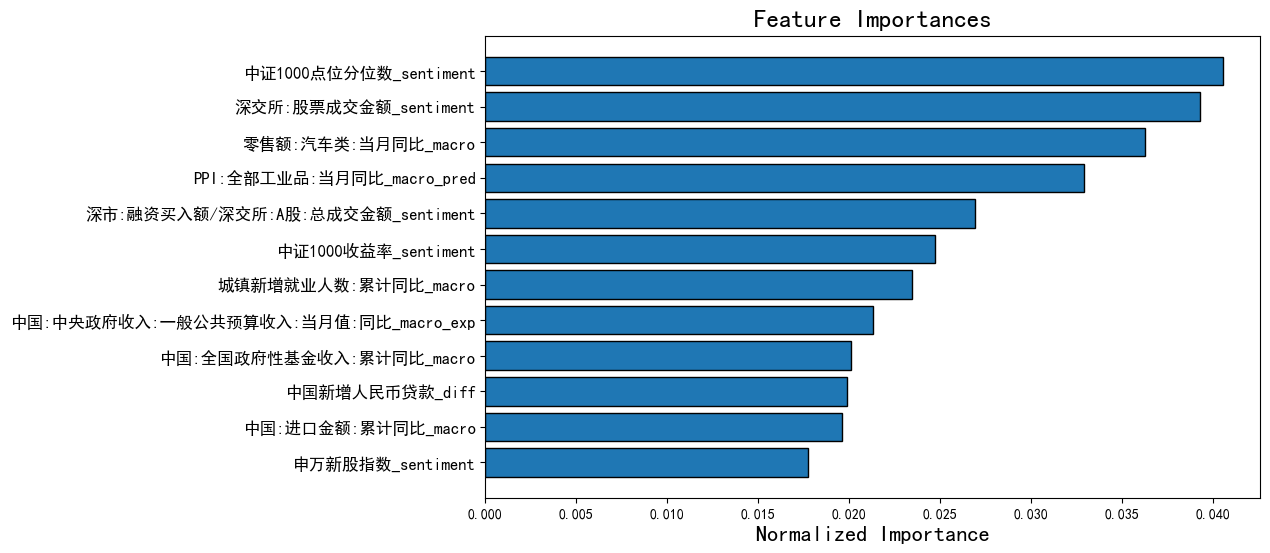

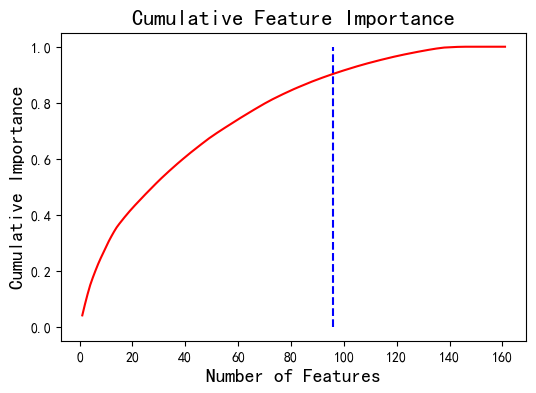

96 features required for 0.90 of cumulative importance
[LightGBM] [Warning] Unknown parameter: learnnig_rate
[LightGBM] [Warning] lambda_l1 is set=0.0001, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0001
[LightGBM] [Warning] boosting is set=dart, boosting_type=gbdt will be ignored. Current value: boosting=dart
[LightGBM] [Warning] Unknown parameter: learnnig_rate
[LightGBM] [Warning] lambda_l1 is set=0.0001, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0001
[LightGBM] [Warning] boosting is set=dart, boosting_type=gbdt will be ignored. Current value: boosting=dart
[LightGBM] [Warning] Unknown parameter: learnnig_rate
[LightGBM] [Warning] lambda_l1 is set=0.0001, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0001
[LightGBM] [Warning] boosting is set=dart, boosting_type=gbdt will be ignored. Current value: boosting=dart
[LightGBM] [Warning] Unknown parameter: learnnig_rate
[LightGBM] [Warning] lambda_l1 is set=0.0001, reg_alpha=0.0 will be ignored. C

/data/zuoc/tml_models/feature_selector/feature_selector/feature_selector.py:223: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  record_collinear = record_collinear.append(temp_df, ignore_index = True)


84 features with a correlation magnitude greater than 0.70.

Training Gradient Boosting Model

[1]	valid_0's l2: 9.33472
[2]	valid_0's l2: 9.4956
[3]	valid_0's l2: 9.83788
[4]	valid_0's l2: 9.93947
[5]	valid_0's l2: 10.1465
[6]	valid_0's l2: 10.1762
[7]	valid_0's l2: 10.2421
[8]	valid_0's l2: 10.2087
[9]	valid_0's l2: 10.4446
[10]	valid_0's l2: 10.7339
[11]	valid_0's l2: 10.8231
[12]	valid_0's l2: 10.7871
[13]	valid_0's l2: 10.8182
[14]	valid_0's l2: 10.799
[15]	valid_0's l2: 11.1864
[16]	valid_0's l2: 11.2916
[17]	valid_0's l2: 11.3507
[18]	valid_0's l2: 11.3677
[19]	valid_0's l2: 11.5543
[20]	valid_0's l2: 11.7571
[21]	valid_0's l2: 11.8351
[22]	valid_0's l2: 11.9598
[23]	valid_0's l2: 12.0491
[24]	valid_0's l2: 12.0157
[25]	valid_0's l2: 12.0629
[26]	valid_0's l2: 12.0645
[27]	valid_0's l2: 12.1823
[28]	valid_0's l2: 12.1597
[29]	valid_0's l2: 12.4131
[30]	valid_0's l2: 12.4058
[31]	valid_0's l2: 12.236
[32]	valid_0's l2: 12.1712
[33]	valid_0's l2: 12.2034
[34]	valid_0's l2: 12.1558

/data/zuoc/tml_models/feature_selector/feature_selector/feature_selector.py:658: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  self.feature_importances['normalized_importance'][:plot_n],
/data/zuoc/tml_models/feature_selector/feature_selector/feature_selector.py:663: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  ax.set_yticklabels(self.feature_importances['feature'][:plot_n], size = 12)


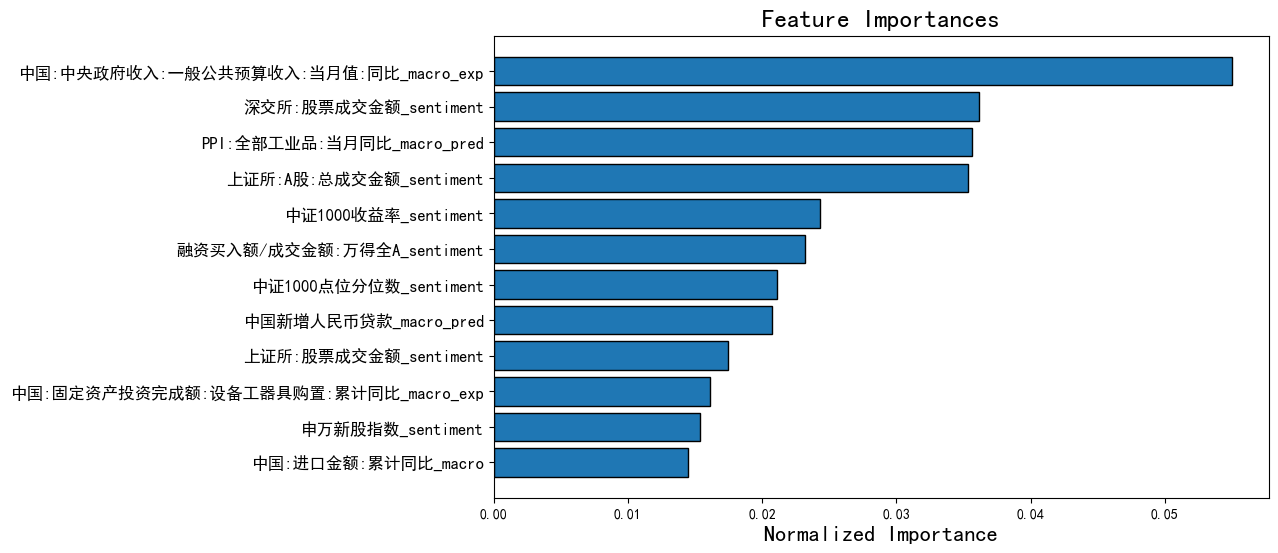

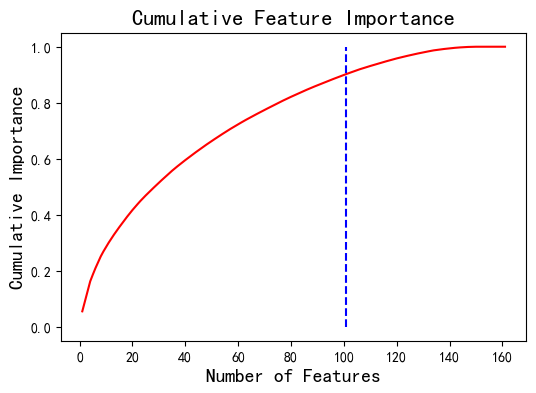

101 features required for 0.90 of cumulative importance
[LightGBM] [Warning] Unknown parameter: learnnig_rate
[LightGBM] [Warning] lambda_l1 is set=0.0001, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0001
[LightGBM] [Warning] boosting is set=dart, boosting_type=gbdt will be ignored. Current value: boosting=dart
[LightGBM] [Warning] Unknown parameter: learnnig_rate
[LightGBM] [Warning] lambda_l1 is set=0.0001, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0001
[LightGBM] [Warning] boosting is set=dart, boosting_type=gbdt will be ignored. Current value: boosting=dart
[LightGBM] [Warning] Unknown parameter: learnnig_rate
[LightGBM] [Warning] lambda_l1 is set=0.0001, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0001
[LightGBM] [Warning] boosting is set=dart, boosting_type=gbdt will be ignored. Current value: boosting=dart
[LightGBM] [Warning] Unknown parameter: learnnig_rate
[LightGBM] [Warning] lambda_l1 is set=0.0001, reg_alpha=0.0 will be ignored. 

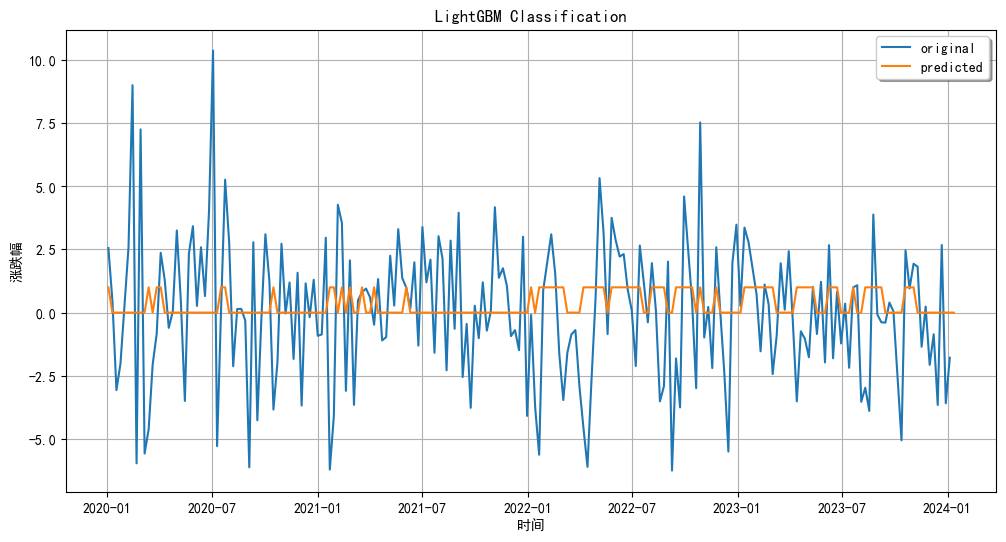

In [ ]:
all_data_copy=all_data_copy[all_data_copy.index>'2010']
date_lists=[datetime(2020, 1, 1),datetime(2022, 1, 1),datetime(2024, 1, 30)]
factors,models,result,params,result=get_online_res(date_lists, all_data, all_data_test)

In [ ]:
import pickle
import os
from copy import deepcopy
saved_model = best_model
path1='数据_update/result/v4.7/'
if not os.path.exists(path1):
    os.makedirs(path1)
with open(path1+'factor.pkl', 'wb') as f:
    pickle.dump(factors,f)
with open(path1+'model.pkl', 'wb') as f:
    pickle.dump(saved_model,f)
from styleframe import StyleFrame, Styler, utils
from openpyxl import Workbook
from openpyxl.chart import (
    LineChart,
    Reference,
)
from openpyxl.chart.layout import Layout, ManualLayout
from openpyxl.chart.axis import DateAxis
from openpyxl.styles import Font, Color
res1 = res.copy(deep=True)
res1.reset_index(inplace=True)
res1['累计多空策略收益'] = res1['多空策略收益'].fillna(0).transform('cumsum')
res1['累计做多收益'] = res1['做多收益'].fillna(0).transform('cumsum')
res1['累计做空收益'] = res1['做空收益'].fillna(0).transform('cumsum')
res1['accuracy'] = (res1['label3'] == res1['predictions']).astype(int)
res1['累计胜率'] = res1['accuracy'].cumsum() / (res1.index.values + 1)
res1['累计胜率'] = res1['累计胜率'].transpose()
print(res1['累计胜率'])
print(res1.index.values + 1)
del res1['accuracy']
print(res1)
res1.insert(loc=res1.columns.get_loc('predictions') + 1, column='累计胜率', value=res1.pop('累计胜率'))
print(res1)
res1.loc['总计涨跌幅及2023年收益', ['dates', '涨跌幅', '多空策略收益']] = ['总计涨跌幅及2023年收益', res1['涨跌幅'].sum(), 
                    res1.loc[(res1['dates']>=datetime(2023,1,1)) & (res1['dates']<=datetime(2023,12,31))]['多空策略收益'].sum()]

def draw_chart_openpyxl(worksheet):
    # pos: (row, column)
    font = Font(name='Calibri',
                    size=12,
                    bold=True,
                    italic=False,
                    vertAlign=None,
                    underline='none',
                    strike=False,
                    color='FF000000')
    c2 = LineChart()
    c2.title = "多空策略收益曲线"
    c2.style = 6
    c2.font = font
    c2.y_axis.title = "收益百分比"
    c2.y_axis.crossAx = 500
    c2.x_axis = DateAxis(crossAx=100)
    c2.width = 15
    c2.height = 15
    c2.x_axis.number_format = 'yyyy-mm'
#     c2.x_axis.majorTimeUnit = "days"
    c2.x_axis.title = "日期"
    c2.x_axis.tickLblPos = "low"
    c2.x_axis.txPr = deepcopy(c2.x_axis.title.text.rich)
    c2.x_axis.txPr.properties.rot = "-2700000"
    c2.layout = Layout(
        manualLayout=ManualLayout(
            yMode='edge',
            xMode='edge',
            x=0.1, y=0.1,
            h=0.75, w=0.85
        )
    )
    c2.legend.layout = Layout(
        manualLayout=ManualLayout(
            yMode='edge',
            xMode='edge',
            x=0, y=0.9,
            h=0.1, w=1
        )
    )
    data = Reference(worksheet, min_col=9, max_col=11, min_row=1, max_row=len(res1['涨跌幅'])-2)
    c2.add_data(data, titles_from_data=True)
    dates = Reference(worksheet, min_col=1, max_col=1, min_row=2, max_row=len(res1['涨跌幅'])-2)
    c2.set_categories(dates)
    c2.series[0].graphicalProperties.line.solidFill = 'FF0000'  # Blue
    c2.series[1].graphicalProperties.line.solidFill = '91FF00' 
    c2.series[2].graphicalProperties.line.solidFill = '0073FF' 
    worksheet.add_chart(c2, "L1")
    print(worksheet)
    return worksheet

writer = StyleFrame.ExcelWriter(path1+'result.xlsx')
sf=StyleFrame(res1, Styler(date_format='YYYY-MM-DD',
                       date_time_format='YYYY-MM-DD'))
sf.apply_headers_style(style_index_header=True, styler_obj=Styler(bold=True, protection=False, font_size=12))
sf.set_column_width(columns=res1.columns, width=16)
sf.apply_column_style(cols_to_style=[column for column in res1.columns if column != 'dates'], 
                      styler_obj=Styler(bold=False, number_format=utils.number_formats.general, font_size=12))
sf.apply_column_style(cols_to_style='dates', 
                      styler_obj=Styler(bold=True, font_size=12, date_format='YYYY-MM-DD', date_time_format='YYYY-MM-DD'))
sf.to_excel(excel_writer=writer, sheet_name='results')
wb = draw_chart_openpyxl(writer.book.get_sheet_by_name('results'))

params_frame = pd.DataFrame(saved_model.get_params(), index=['取值']).transpose()
params_frame.reset_index(inplace=True)
sf=StyleFrame(params_frame)
sf.apply_headers_style(style_index_header=True, styler_obj=Styler(bold=True, protection=False, font_size=12))
sf.set_column_width(columns=params_frame.columns, width=24)
sf.to_excel(excel_writer=writer, sheet_name='params')

params_frame = fs.feature_importances.loc[:, ['feature', 'normalized_importance']][:len(factors)]
params_frame.reset_index(inplace=True)
params_frame = params_frame.rename(columns={'feature': '因子名'})
sf=StyleFrame(params_frame)
sf.apply_headers_style(style_index_header=True, styler_obj=Styler(bold=True, protection=False, font_size=12))
sf.set_column_width(columns=params_frame.columns, width=24)
sf.to_excel(excel_writer=writer, sheet_name='factors')

writer.close()
# res.to_csv(path1+'result.csv')

NameError: name 'best_model' is not defined